In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Code optionnel pour éliminer les warnings

from warnings import filterwarnings
filterwarnings('ignore')

Text(0, 0.5, 'y=f(x)')

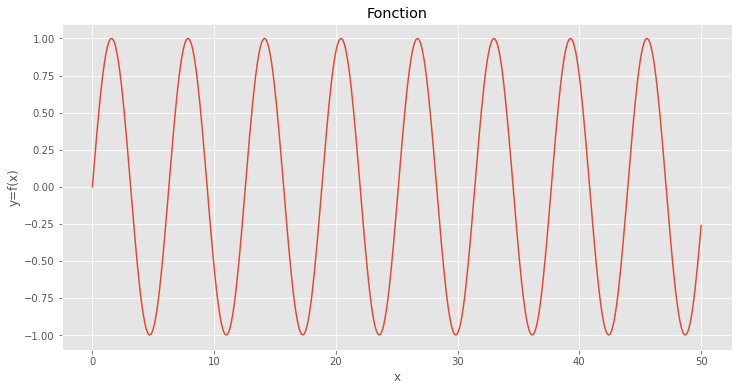

In [500]:
plt.figure(figsize=(12,6))
x = np.linspace(0,50,500)   #génère 500 pts linéairement séparés entre 0 et 50
y = np.sin(x)
plt.plot(x,y)
plt.title('Fonction')
plt.xlabel('x')
plt.ylabel('y=f(x)')

In [501]:
df = pd.DataFrame(data=y, index=x, columns=['f(x)'])
df.head()

,f(x)
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157


<h1>Répartition Train/Test<h1>

In [502]:
len(df)

500

In [503]:
test_pourcent=0.3  #20% des données pour les tests

In [504]:
#point de separation du jeu de train et du jeu de test
len(df)*test_pourcent

150.0

In [505]:
index_sep=int(len(df)-len(df)*test_pourcent)
index_sep

350

In [506]:
train_set=df.iloc[:index_sep]
test_set=df.iloc[index_sep:]

In [507]:
train_set

,f(x)
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157
...,...
34.569138,-0.011619
34.669339,-0.111587
34.769539,-0.210435
34.869739,-0.307172


In [508]:
test_set

,f(x)
35.070140,-0.490463
35.170341,-0.575178
35.270541,-0.654122
35.370741,-0.726505
35.470942,-0.791600
...,...
49.599198,-0.618069
49.699399,-0.536331
49.799599,-0.449212
49.899800,-0.357587


<h1>Mise à l'échelle des données </h1>

In [509]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [510]:
scaler = MMS()
scaler.fit(train_set)

MinMaxScaler()

In [511]:
scaled_train=scaler.transform(train_set)
scaled_test=scaler.transform(test_set)

In [512]:
#Class pour générer des batch ou lot de sequence temporel
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#plus lenght élévé plus l'entrainement est long: les length points à utiliser pour prédire 
length=50   #choisi pour tenir compte des effets de saisonnalité et de tendance: à partir des lenght derniers données predit la sortie
batch_size=1

generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)    #générer des données dont la taille est len(trai_set)-lenght, nos x et notre y sont dans scaled_train

In [513]:
len(generator)

300

In [514]:
X,y=generator[0] 

In [515]:
X

array([[[0.50000882],
        [0.55002633],
        [0.59954208],
        [0.64805934],
        [0.6950914 ],
        [0.74016644],
        [0.78283229],
        [0.82266093],
        [0.85925281],
        [0.89224086],
        [0.92129415],
        [0.94612121],
        [0.96647301],
        [0.98214536],
        [0.99298105],
        [0.99887138],
        [0.99975726],
        [0.99562981],
        [0.98653042],
        [0.97255038],
        [0.95382993],
        [0.93055688],
        [0.90296469],
        [0.87133016],
        [0.83597063],
        [0.79724083],
        [0.75552928],
        [0.71125442],
        [0.6648604 ],
        [0.61681264],
        [0.56759313],
        [0.51769564],
        [0.46762071],
        [0.4178707 ],
        [0.36894467],
        [0.32133344],
        [0.27551464],
        [0.23194789],
        [0.19107026],
        [0.15329182],
        [0.11899154],
        [0.08851353],
        [0.06216352],
        [0.04020585],
        [0.0228608 ],
        [0

In [516]:
y

array([[0.02198134]])

<h1>Création du modèle </h1>

In [517]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [518]:
n_features=1

In [519]:
model=Sequential()


In [520]:
model.add(SimpleRNN(50, input_shape=(length,n_features)))  #SimpleRNN
#model.add(LSTM(50, batch_input_shape=(length,n_features,1), stateful=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [521]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 50)                2600      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [522]:
model.fit(generator, epochs=8)

Epoch 1/8
300/300 [==============================] - 4s 11ms/step - loss: 0.0779
Epoch 2/8
300/300 [==============================] - 2s 6ms/step - loss: 3.9598e-04
Epoch 3/8
300/300 [==============================] - 2s 6ms/step - loss: 1.7001e-05
Epoch 4/8
300/300 [==============================] - 3s 8ms/step - loss: 7.7459e-05
Epoch 5/8
300/300 [==============================] - 1s 5ms/step - loss: 7.3227e-04
Epoch 6/8
300/300 [==============================] - 2s 6ms/step - loss: 2.8318e-05
Epoch 7/8
300/300 [==============================] - 2s 6ms/step - loss: 2.9085e-05
Epoch 8/8
300/300 [==============================] - 3s 10ms/step - loss: 2.9503e-05


<AxesSubplot:>

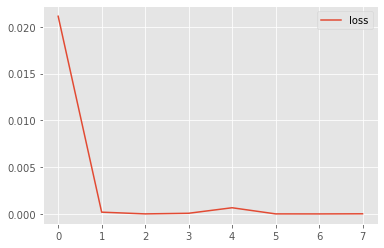

In [523]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [524]:
first_eval_batch=scaled_train[-length:] #batch constitué de lenght(ie 50) derniers points du set d'entrainement 

In [525]:
first_eval_batch=first_eval_batch.reshape(1,length, n_features)    #reshape au format attendu par le model

In [526]:
model.predict(first_eval_batch)  #prédire un point dans le futur à partir des length derniers point d'entrainement

array([[0.253509]], dtype=float32)

In [527]:
scaled_test[0]   #valeur qu'on devait avoir 

array([0.25477186])

In [528]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length, n_features)

In [529]:
current_batch

array([[[0.01150879],
        [0.02462966],
        [0.0425194 ],
        [0.06499854],
        [0.09184159],
        [0.12277927],
        [0.1575012 ],
        [0.19565907],
        [0.2368701 ],
        [0.28072086],
        [0.32677146],
        [0.37455993],
        [0.42360686],
        [0.47342024],
        [0.52350035],
        [0.57334479],
        [0.62245356],
        [0.67033399],
        [0.71650576],
        [0.7605057 ],
        [0.8018924 ],
        [0.8402507 ],
        [0.87519578],
        [0.90637709],
        [0.93348182],
        [0.95623807],
        [0.97441756],
        [0.98783792],
        [0.9963645 ],
        [0.99991178],
        [0.99844418],
        [0.99197641],
        [0.98057336],
        [0.96434941],
        [0.94346733],
        [0.9181366 ],
        [0.88861133],
        [0.8551877 ],
        [0.81820102],
        [0.77802232],
        [0.73505467],
        [0.6897291 ],
        [0.64250031],
        [0.59384209],
        [0.54424255],
        [0

In [530]:
current_batch[:,1:,:]

array([[[0.02462966],
        [0.0425194 ],
        [0.06499854],
        [0.09184159],
        [0.12277927],
        [0.1575012 ],
        [0.19565907],
        [0.2368701 ],
        [0.28072086],
        [0.32677146],
        [0.37455993],
        [0.42360686],
        [0.47342024],
        [0.52350035],
        [0.57334479],
        [0.62245356],
        [0.67033399],
        [0.71650576],
        [0.7605057 ],
        [0.8018924 ],
        [0.8402507 ],
        [0.87519578],
        [0.90637709],
        [0.93348182],
        [0.95623807],
        [0.97441756],
        [0.98783792],
        [0.9963645 ],
        [0.99991178],
        [0.99844418],
        [0.99197641],
        [0.98057336],
        [0.96434941],
        [0.94346733],
        [0.9181366 ],
        [0.88861133],
        [0.8551877 ],
        [0.81820102],
        [0.77802232],
        [0.73505467],
        [0.6897291 ],
        [0.64250031],
        [0.59384209],
        [0.54424255],
        [0.49419928],
        [0

In [531]:
first_eval_batch

array([[0.01150879],
       [0.02462966],
       [0.0425194 ],
       [0.06499854],
       [0.09184159],
       [0.12277927],
       [0.1575012 ],
       [0.19565907],
       [0.2368701 ],
       [0.28072086],
       [0.32677146],
       [0.37455993],
       [0.42360686],
       [0.47342024],
       [0.52350035],
       [0.57334479],
       [0.62245356],
       [0.67033399],
       [0.71650576],
       [0.7605057 ],
       [0.8018924 ],
       [0.8402507 ],
       [0.87519578],
       [0.90637709],
       [0.93348182],
       [0.95623807],
       [0.97441756],
       [0.98783792],
       [0.9963645 ],
       [0.99991178],
       [0.99844418],
       [0.99197641],
       [0.98057336],
       [0.96434941],
       [0.94346733],
       [0.9181366 ],
       [0.88861133],
       [0.8551877 ],
       [0.81820102],
       [0.77802232],
       [0.73505467],
       [0.6897291 ],
       [0.64250031],
       [0.59384209],
       [0.54424255],
       [0.49419928],
       [0.44421429],
       [0.394

In [532]:
np.append(current_batch[:,1:,:],[[[99]]], axis=1)    #décalage de pas de temps 1 : prend tous sauf le premier point , 99 notre prochaine prédiction

array([[[2.46296564e-02],
        [4.25193970e-02],
        [6.49985446e-02],
        [9.18415947e-02],
        [1.22779265e-01],
        [1.57501198e-01],
        [1.95659073e-01],
        [2.36870100e-01],
        [2.80720861e-01],
        [3.26771459e-01],
        [3.74559925e-01],
        [4.23606861e-01],
        [4.73420239e-01],
        [5.23500347e-01],
        [5.73344795e-01],
        [6.22453556e-01],
        [6.70333986e-01],
        [7.16505760e-01],
        [7.60505698e-01],
        [8.01892403e-01],
        [8.40250696e-01],
        [8.75195776e-01],
        [9.06377085e-01],
        [9.33481821e-01],
        [9.56238075e-01],
        [9.74417564e-01],
        [9.87837916e-01],
        [9.96364501e-01],
        [9.99911784e-01],
        [9.98444179e-01],
        [9.91976409e-01],
        [9.80573357e-01],
        [9.64349414e-01],
        [9.43467335e-01],
        [9.18136603e-01],
        [8.88611329e-01],
        [8.55187702e-01],
        [8.18201020e-01],
        [7.7

In [533]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]  #length derniers points du set d'entrainement
current_batch=first_eval_batch.reshape(1,length, n_features)

for i in range(len(test_set)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  #décalage de current_batch d'une unité de temps(suppression du 1er point): mise à jour du bacth actuel
    

In [534]:
 test_predictions

[array([0.253509], dtype=float32),
 array([0.2113493], dtype=float32),
 array([0.1720066], dtype=float32),
 array([0.1361818], dtype=float32),
 array([0.10393029], dtype=float32),
 array([0.07605155], dtype=float32),
 array([0.05225701], dtype=float32),
 array([0.03309329], dtype=float32),
 array([0.0189459], dtype=float32),
 array([0.00943348], dtype=float32),
 array([0.00446533], dtype=float32),
 array([0.00480345], dtype=float32),
 array([0.01001238], dtype=float32),
 array([0.01993678], dtype=float32),
 array([0.0346883], dtype=float32),
 array([0.05455264], dtype=float32),
 array([0.07840019], dtype=float32),
 array([0.1061644], dtype=float32),
 array([0.13849728], dtype=float32),
 array([0.17403866], dtype=float32),
 array([0.21284275], dtype=float32),
 array([0.2542699], dtype=float32),
 array([0.29888552], dtype=float32),
 array([0.34446794], dtype=float32),
 array([0.39158162], dtype=float32),
 array([0.43981248], dtype=float32),
 array([0.48804715], dtype=float32),
 array([0.

In [535]:
scaled_test

array([[ 2.54771858e-01],
       [ 2.12413576e-01],
       [ 1.72940369e-01],
       [ 1.36748222e-01],
       [ 1.04200205e-01],
       [ 7.56228302e-02],
       [ 5.13027781e-02],
       [ 3.14840206e-02],
       [ 1.63653740e-02],
       [ 6.09850442e-03],
       [ 7.86406233e-04],
       [ 4.82368936e-04],
       [ 5.18944255e-03],
       [ 1.48604070e-02],
       [ 2.93982459e-02],
       [ 4.86571196e-02],
       [ 7.24438285e-02],
       [ 1.00519751e-01],
       [ 1.32603237e-01],
       [ 1.68372434e-01],
       [ 2.07468515e-01],
       [ 2.49499280e-01],
       [ 2.94043086e-01],
       [ 3.40653084e-01],
       [ 3.88861695e-01],
       [ 4.38185303e-01],
       [ 4.88129107e-01],
       [ 5.38192085e-01],
       [ 5.87872019e-01],
       [ 6.36670534e-01],
       [ 6.84098097e-01],
       [ 7.29678927e-01],
       [ 7.72955770e-01],
       [ 8.13494485e-01],
       [ 8.50888399e-01],
       [ 8.84762386e-01],
       [ 9.14776632e-01],
       [ 9.40630043e-01],
       [ 9.6

In [536]:
true_predictions=scaler.inverse_transform(test_predictions)   #les vraies prédictions à la bonne échelle

In [537]:
true_predictions

array([[-0.49298874],
       [-0.57730632],
       [-0.65598996],
       [-0.72763799],
       [-0.79213958],
       [-0.84789585],
       [-0.89548388],
       [-0.93381046],
       [-0.96210462],
       [-0.98112905],
       [-0.99106513],
       [-0.99038891],
       [-0.97997127],
       [-0.96012292],
       [-0.93062052],
       [-0.89089272],
       [-0.84319867],
       [-0.78767147],
       [-0.72300714],
       [-0.65192594],
       [-0.57431948],
       [-0.49146701],
       [-0.40223772],
       [-0.31107491],
       [-0.21684961],
       [-0.12039003],
       [-0.02392281],
       [ 0.07178422],
       [ 0.16749728],
       [ 0.26221365],
       [ 0.35261628],
       [ 0.44113211],
       [ 0.52647812],
       [ 0.60696181],
       [ 0.68167292],
       [ 0.75168931],
       [ 0.81398098],
       [ 0.86786383],
       [ 0.91388034],
       [ 0.95098496],
       [ 0.97720804],
       [ 0.9936619 ],
       [ 1.00074087],
       [ 0.99645038],
       [ 0.98224512],
       [ 0

In [538]:
test_set['Pred']=true_predictions
test_set

,f(x),Pred
35.070140,-0.490463,-0.492989
35.170341,-0.575178,-0.577306
35.270541,-0.654122,-0.655990
35.370741,-0.726505,-0.727638
35.470942,-0.791600,-0.792140
...,...,...
49.599198,-0.618069,-0.524705
49.699399,-0.536331,-0.449365
49.799599,-0.449212,-0.371304
49.899800,-0.357587,-0.287946


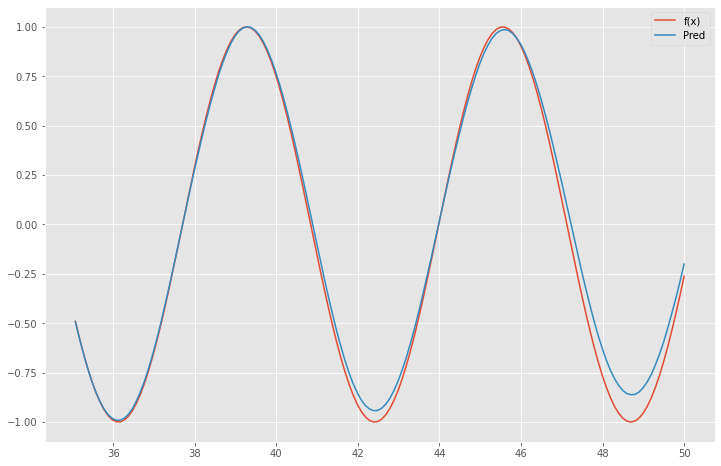

In [539]:
test_set.plot(figsize=(12,8))
plt.savefig("Courbe_prédiction.pdf")

In [540]:
#Utilisation de l'unité LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [541]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)  #patience= nombre d'epoch avant d'arreter
length=49
generator=TimeseriesGenerator(scaled_train, scaled_train, 
                                   length=length, batch_size=1)
validation_generator=TimeseriesGenerator(scaled_test, scaled_test,
                                        length=length, batch_size=1)

In [542]:
model=Sequential()
model.add(LSTM(49, input_shape=(length,n_features)))  
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [543]:
model.fit(generator, epochs=20, validation_data=validation_generator,
           callbacks=[early_stop])

Epoch 1/20
301/301 [==============================] - 6s 14ms/step - loss: 0.0388 - val_loss: 5.0397e-05
Epoch 2/20
301/301 [==============================] - 4s 15ms/step - loss: 7.8646e-05 - val_loss: 1.3503e-04
Epoch 3/20
301/301 [==============================] - 4s 14ms/step - loss: 3.0490e-04 - val_loss: 3.7611e-05
Epoch 4/20
301/301 [==============================] - 4s 13ms/step - loss: 5.4862e-05 - val_loss: 3.3247e-05
Epoch 5/20
301/301 [==============================] - 4s 14ms/step - loss: 0.0023 - val_loss: 8.4688e-05
Epoch 6/20
301/301 [==============================] - 4s 15ms/step - loss: 5.9687e-05 - val_loss: 2.4732e-05
Epoch 7/20
301/301 [==============================] - 4s 14ms/step - loss: 4.1136e-05 - val_loss: 6.2475e-05
Epoch 8/20
301/301 [==============================] - 4s 12ms/step - loss: 3.2538e-05 - val_loss: 1.0347e-05
Epoch 9/20
301/301 [==============================] - 4s 14ms/step - loss: 2.1181e-05 - val_loss: 1.4047e-05
Epoch 10/20
301/301 [======

In [544]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]  #length derniers points du set d'entrainement
current_batch=first_eval_batch.reshape(1,length, n_features)

for i in range(len(test_set)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  #décalage de current_batch d'une unité de temps(suppression du 1er point): mise à jour du bacth actuel
    

In [545]:
true_predictions=scaler.inverse_transform(test_predictions)

In [546]:
test_set['LSTM pred']=true_predictions

<AxesSubplot:>

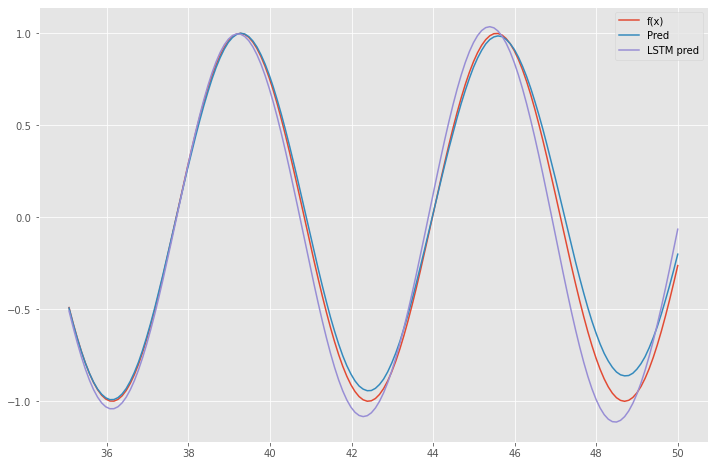

In [547]:
test_set.plot(figsize=(12,8))

In [548]:
#predire des valeurs après 50: prévoir dans le futur
full_scaler=MMS()
scaled_full_data = full_scaler.fit_transform(df)

In [549]:
generator=TimeseriesGenerator(scaled_full_data, scaled_full_data,
                             length=length, batch_size=1)

In [590]:
model=Sequential()
model.add(LSTM(50, input_shape=(length,n_features)))  
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [591]:
model.fit(generator, epochs=20, validation_data=validation_generator,
           callbacks=[early_stop])

Epoch 1/20
451/451 [==============================] - 10s 15ms/step - loss: 0.0501 - val_loss: 2.2009e-04
Epoch 2/20
451/451 [==============================] - 6s 14ms/step - loss: 1.4817e-04 - val_loss: 8.9026e-05
Epoch 3/20
451/451 [==============================] - 6s 13ms/step - loss: 1.6189e-04 - val_loss: 9.5333e-05
Epoch 4/20
451/451 [==============================] - 6s 13ms/step - loss: 1.9674e-04 - val_loss: 3.3550e-05
Epoch 5/20
451/451 [==============================] - 6s 13ms/step - loss: 2.0650e-04 - val_loss: 9.7702e-05
Epoch 6/20
451/451 [==============================] - 6s 13ms/step - loss: 2.4492e-04 - val_loss: 4.7971e-05


In [595]:
forecast=[]
first_eval_batch=scaled_train[-length:]  #length derniers points du set d'entrainement
current_batch=first_eval_batch.reshape(1,length, n_features)

for i in range(50):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  #décalage de current_batch d'une unité de temps(suppression du 1er point): mise à jour du bacth actuel
    

In [596]:
forecast=full_scaler.inverse_transform(forecast)

In [597]:
forecast

array([[-0.496378  ],
       [-0.58551849],
       [-0.66889173],
       [-0.74546287],
       [-0.81423734],
       [-0.87431872],
       [-0.92494251],
       [-0.96550238],
       [-0.99556505],
       [-1.01487514],
       [-1.02334964],
       [-1.02106442],
       [-1.00823392],
       [-0.98518838],
       [-0.95234968],
       [-0.91020895],
       [-0.85930658],
       [-0.80021738],
       [-0.73353888],
       [-0.6598853 ],
       [-0.5798849 ],
       [-0.49418078],
       [-0.40343565],
       [-0.30833684],
       [-0.20960473],
       [-0.10799991],
       [-0.00433186],
       [ 0.10053589],
       [ 0.20568062],
       [ 0.31012047],
       [ 0.41281621],
       [ 0.51268067],
       [ 0.60859211],
       [ 0.69941426],
       [ 0.78402167],
       [ 0.86132993],
       [ 0.93032828],
       [ 0.99011432],
       [ 1.03992502],
       [ 1.07916052],
       [ 1.10740372],
       [ 1.12442575],
       [ 1.13018272],
       [ 1.12480339],
       [ 1.10856766],
       [ 1

In [598]:
50*0.1


5.0

In [607]:
forecast_index=np.arange(50.1,55.1, 0.1)

In [620]:
forecast_index

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53. , 53.1, 53.2, 53.3,
       53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1, 54.2, 54.3, 54.4,
       54.5, 54.6, 54.7, 54.8, 54.9, 55. ])

In [621]:
forecast

array([[-0.496378  ],
       [-0.58551849],
       [-0.66889173],
       [-0.74546287],
       [-0.81423734],
       [-0.87431872],
       [-0.92494251],
       [-0.96550238],
       [-0.99556505],
       [-1.01487514],
       [-1.02334964],
       [-1.02106442],
       [-1.00823392],
       [-0.98518838],
       [-0.95234968],
       [-0.91020895],
       [-0.85930658],
       [-0.80021738],
       [-0.73353888],
       [-0.6598853 ],
       [-0.5798849 ],
       [-0.49418078],
       [-0.40343565],
       [-0.30833684],
       [-0.20960473],
       [-0.10799991],
       [-0.00433186],
       [ 0.10053589],
       [ 0.20568062],
       [ 0.31012047],
       [ 0.41281621],
       [ 0.51268067],
       [ 0.60859211],
       [ 0.69941426],
       [ 0.78402167],
       [ 0.86132993],
       [ 0.93032828],
       [ 0.99011432],
       [ 1.03992502],
       [ 1.07916052],
       [ 1.10740372],
       [ 1.12442575],
       [ 1.13018272],
       [ 1.12480339],
       [ 1.10856766],
       [ 1

In [608]:
len(forecast_index)

50

In [609]:
len(forecast)

50

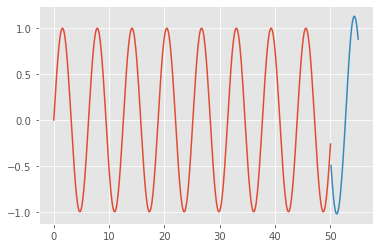

In [610]:
plt.plot(df.index, df['f(x)'])
plt.plot(forecast_index, forecast)